<a href="https://colab.research.google.com/github/guilherme-am/CartolaFC/blob/main/C%C3%B3pia_de_cartolaFC_Escala%C3%A7%C3%A3o_meudataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CartolaFC Análise de Dados e Escalação do time da rodada***

By Guilherme Moreira.

## **README**:
- Este dataset tem o propósito de facilitar a escolha da escalação dos jogadores no fantasy game CartolaFC através de cálculos estatísticos de scouts originais do próprio jogo, com inserção de critérios que melhor define um jogador para dada posição conforme a apresentação dos valores dos scouts no apêndice abaixo.

- Para gerar a tabela da rodada atual do CartolaFC foi acessado os dados do site: https://www.cartolafcbrasil.com.br/scouts . As tabelas foram geradas em pdf e convertidas para csv. Estas estão disponibilizadas no github através do link https://github.com/guilherme-am/CartolaFC e é necessário importá-las para dentro do notebook para iniciar o programa (aqui, utilizei o google colab, mas também pode ser utilizado outros como Jupyter Notebook).

- Para bom funcionamento dos cálculos é de boa prática seguir a ordem de execução natural do notebook (os botões 'play'  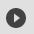 ). Em caso de erro pode sempre reiniciar o notebook e voltar às etapas anteriores ou do início.

- Caso queira que as tabelas executadas ou parte de código executada desapareçam, basta apertar este botão image.png  . Este botão é útil pois por vezes a página fica muito grande devido as tabelas geradas e assim ficamos mais distantes do fim da página, então se quiser diminuir esta distância, usamos esse botão e para reativar é só usar o play.

- A análise e critérios de seleção de jogadores apresenta jogadores com excelente parâmetros ao longo do campeonato, portanto a intenção é atingir um valor médio-alto por rodada a longo prazo e menos pontuações oscilosas. Pretende-se atingir uma constância na pontuação.

- Estudos mais avançados com utilização de métodos de AI e ML em Python ainda estão por ser implementados.

***Created by: Guilherme Moreira.***

##### âpendice dos valores dos scouts:
 - https://www.cartolafcbrasil.com.br/tutoriais/7/como-funciona-o-sistema-de-pontuacao-do-cartola-fc

In [ ]:
!java -version

openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
# To be more precisely, it's better to use `{sys.executable} -m pip install tabula-py`
!pip install -q tabula-py

Com import tabula pretendo criar um dataset dos jogadores para cada rodada ao invés de utilizar o github do caRtola como base de dados.


> Para isso gerei um pdf com os scouts do site https://www.cartolafcbrasil.com.br/scouts fazendo seleção da tabela página por página e salvando como um pdf e por fim mesclando todos em um só pdf.
Converti o pdf com os jogadores da rodada 24 em uma tabela, depois converti o pdf para csv e por fim gerei uma dataframe df1 para tal.

**tentarei agora refazer os dados e cálculos com base na minha df1***

In [ ]:
import tabula
 
tabula.environment_info()

Python version:
    3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Java version:
    openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
tabula-py version: 2.2.0
platform: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
uname:
    uname_result(system='Linux', node='b4d05378586e', release='4.19.112+', version='#1 SMP Thu Jul 23 08:00:38 PDT 2020', machine='x86_64', processor='x86_64')
linux_distribution: ('Ubuntu', '18.04', 'bionic')
mac_ver: ('', ('', '', ''), '')
    


####1. Convertendo o pdf em tabula e gerando uma df chamada dfs:

- Neste momento é necessário importar o pdf da rodada'X'.pdf para o 'Arquivos' do google colab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import tabula
 
#inserir path do pdf da rodada aqui (rodada'X'.pdf):
pdf_path = '/content/rodada29.pdf'
 
dfs = tabula.read_pdf(pdf_path, pages="all")
# read_pdf returns list of DataFrames
print(len(dfs))
dfs[0]

4


,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI
0,Thiago Galhardo (MEI),NaN,"19,64",25,"7,46","0,00","0,00",21.0,16.0,5.0,NaN,40.0,23.0,16.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,23.0,15.0,114.0
1,Keno (ATA),NaN,"14,18",23,"7,11","0,00","0,00",35.0,10.0,5.0,NaN,39.0,28.0,24.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,29.0,21.0,220.0
2,Pepê (ATA),NaN,"14,19",22,"6,54","2,30","0,18",30.0,8.0,4.0,NaN,48.0,14.0,8.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,9.0,3.0,100.0
3,Vina (MEI),NaN,"10,42",20,"6,35","2,40","0,25",11.0,8.0,6.0,NaN,16.0,27.0,23.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,16.0,4.0,181.0
4,Arrascaeta (MEI),NaN,"19,05",16,"6,35","16,30","2,14",24.0,5.0,4.0,NaN,19.0,13.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,157.0
5,Claudinho (ATA),NaN,"16,27",24,"5,66","17,20","2,76",40.0,9.0,2.0,NaN,35.0,23.0,20.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,22.0,4.0,229.0
6,Juan Ramírez (ATA),NaN,"4,33",4,"5,55","6,50","0,04",2.0,2.0,1.0,NaN,10.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,11.0,NaN,27.0
7,Gabriel (ATA),NaN,"11,82",14,"5,47","2,90","0,86",4.0,7.0,NaN,NaN,14.0,19.0,12.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,4.0,9.0,74.0
8,Raul (MEI),NaN,"11,02",19,"5,46","16,90","2,30",78.0,2.0,2.0,NaN,49.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,32.0,1.0,114.0
9,Brenner (ATA),NaN,"6,26",19,"5,44","-1,00","-3,60",11.0,8.0,1.0,NaN,30.0,14.0,13.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,15.0,5.0,33.0


####1.1 Convertendo o pdf em csv para depois gerar o dataframe panda df:

In [ ]:
from tabula import convert_into
#converter pdf em csv e cria um arquivo rodada'X'.csv:
convert_into("rodada29.pdf", "scouts-rodada29.csv", output_format="csv",pages="all")

In [ ]:
from IPython.display import Image, HTML

#df = pd.read_csv('scouts-rodada27.csv')

# ------- MÉTODO PARA PASSAR TODAS AS 'VÍRGULAS' DO FICHEIRO PARA 'PONTO'----------
#https://stackoverflow.com/questions/46527743/python-pandas-correct-way-to-change-comma-decimal-to-dot-decimal-in-pandas-data?noredirect=1&lq=1

df = pd.read_csv('scouts-rodada29.csv', quotechar='"', decimal=",")
df.to_csv('scouts-rodada29.csv', sep=',', encoding='utf-8', quotechar='"', decimal='.')
# ---------------------------------------------------------------------------------
df #os clubes na tabela aparecem como NaN pois na tabela original era uma imagem dos escudos;

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI
0,Thiago Galhardo (MEI),NaN,19.64,25,7.46,0.0,0.00,21.0,16.0,5.0,NaN,40.0,23.0,16.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,23.0,15.0,114.0
1,Keno (ATA),NaN,14.18,23,7.11,0.0,0.00,35.0,10.0,5.0,NaN,39.0,28.0,24.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,29.0,21.0,220.0
2,Pepê (ATA),NaN,14.19,22,6.54,2.3,0.18,30.0,8.0,4.0,NaN,48.0,14.0,8.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,9.0,3.0,100.0
3,Vina (MEI),NaN,10.42,20,6.35,2.4,0.25,11.0,8.0,6.0,NaN,16.0,27.0,23.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,16.0,4.0,181.0
4,Arrascaeta (MEI),NaN,19.05,16,6.35,16.3,2.14,24.0,5.0,4.0,NaN,19.0,13.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Thiago Andrade (ATA),NaN,0.78,1,0.00,0.0,-0.22,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,3.0
194,Gustavo Morínigo (TEC),NaN,6.81,0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Praxedes (MEI),NaN,0.78,12,-0.01,1.2,0.00,15.0,NaN,NaN,NaN,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,18.0,1.0,68.0
196,Ramon (MEI),NaN,0.78,6,-0.27,-2.9,-0.31,4.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,18.0


### 2. Iniciando "cleaning the data" pelas posição dos goleiros

In [ ]:
goleiro = df['Nome'].str.contains('GOL') #variavel goleiro = coluna Nome que contem 'gol'
                                         #https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
print(goleiro.head())
df.goleiro = df[goleiro] #criado dataframe dos goleiros
print(df.goleiro.shape) #= (40,25) todos goleiros da lista

0    False
1    False
2    False
3    False
4    False
Name: Nome, dtype: bool
(18, 25)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
df.goleiro

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI
1,Walter (GOL),NaN,5.84,2,8.75,-0.4,-2.37,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,15.0
29,Tadeu (GOL),NaN,10.00,19,4.42,7.6,0.08,NaN,NaN,NaN,6.0,7.0,NaN,1.0,NaN,30.0,1.0,NaN,NaN,NaN,NaN,30.0,1.0,NaN,175.0
33,Paulo Victor (GOL),NaN,6.36,6,4.33,0.0,0.00,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,40.0
34,Jean (GOL),NaN,10.41,23,4.26,0.0,0.00,1.0,2.0,NaN,6.0,8.0,1.0,1.0,NaN,28.0,1.0,NaN,NaN,1.0,NaN,26.0,1.0,NaN,196.0
38,Tiago Volpi (GOL),NaN,12.94,21,3.95,0.0,0.00,1.0,NaN,1.0,6.0,4.0,NaN,NaN,NaN,20.0,3.0,NaN,NaN,1.0,NaN,20.0,NaN,NaN,139.0
86,John Victor (GOL),NaN,1.59,5,3.04,2.0,0.38,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,33.0
115,Fernando Prass (GOL),NaN,5.57,21,2.70,0.0,0.00,NaN,NaN,NaN,6.0,2.0,NaN,NaN,NaN,28.0,NaN,NaN,NaN,2.0,NaN,32.0,1.0,NaN,176.0
117,Douglas Friedrich (GOL),NaN,7.88,16,2.69,-4.0,-1.02,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,74.0
125,Everson (GOL),NaN,10.36,14,2.59,0.0,0.00,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,63.0
134,Fernando Miguel (GOL),NaN,9.87,21,2.48,12.2,1.92,NaN,NaN,NaN,6.0,4.0,NaN,NaN,NaN,20.0,2.0,NaN,NaN,NaN,NaN,29.0,NaN,NaN,157.0


### 2.1 GOL - Wrangling the dataframe df.goleiro
- Esta tabela que obtemos só inclui jogadores considerados como prováveis. Precisamos extrair somente então os critérios para escolher os goleiros. São eles:
  - Maior Razão DD/Jogo
  - Menor razão de Gols sofridos/jogo

In [ ]:
#https://stackoverflow.com/questions/34540567/divide-multiple-columns-by-another-column-in-pandas/34540647
DD_J_razao = df.goleiro['Razão_DD/Jogos'] = df.goleiro['DD'].div(df.goleiro['J'], axis=0)
GS_J_razao =  df.goleiro['Razão Gols sofridos/Jogos'] = df.goleiro['GS'].div(df.goleiro['J'], axis=0)
#GS_J_mean = df.goleiro['Média GS/J'] = df.goleiro['J', 'GS'].mean(axis=1)
#df.goleiro.reindex(columns=df.goleiro['Razão Gols sofridos/Jogos']) 
df.goleiro[['Nome','Média','J' ,'GS','DD', 'Razão_DD/Jogos','Razão Gols sofridos/Jogos']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Nome,Média,J,GS,DD,Razão_DD/Jogos,Razão Gols sofridos/Jogos
1,Walter (GOL),8.75,2,NaN,4.0,2.000000,NaN
29,Tadeu (GOL),4.42,19,30.0,30.0,1.578947,1.578947
33,Paulo Victor (GOL),4.33,6,5.0,5.0,0.833333,0.833333
34,Jean (GOL),4.26,23,26.0,28.0,1.217391,1.130435
38,Tiago Volpi (GOL),3.95,21,20.0,20.0,0.952381,0.952381
86,John Victor (GOL),3.04,5,6.0,6.0,1.200000,1.200000
115,Fernando Prass (GOL),2.70,21,32.0,28.0,1.333333,1.523810
117,Douglas Friedrich (GOL),2.69,16,21.0,19.0,1.187500,1.312500
125,Everson (GOL),2.59,14,18.0,13.0,0.928571,1.285714
134,Fernando Miguel (GOL),2.48,21,29.0,20.0,0.952381,1.380952


In [ ]:
Grouped=df.goleiro.groupby('Nome')
GetWeightAvg=lambda g: np.average((g['Razão_DD/Jogos']), weights=g['Média'])
Grouped.apply(GetWeightAvg)

Nome
Cleiton (GOL)              0.421053
Danilo Fernandes (GOL)          NaN
Diego Cavalieri (GOL)      0.928571
Douglas Friedrich (GOL)    1.187500
Everson (GOL)              0.928571
Felipe Alves (GOL)         0.714286
Fernando Miguel (GOL)      0.952381
Fernando Prass (GOL)       1.333333
Hugo Souza (GOL)           1.000000
Jean (GOL)                 1.217391
John Victor (GOL)          1.200000
Luan Polli (GOL)           1.166667
Marcos Felipe (GOL)        0.666667
Paulo Victor (GOL)         0.833333
Santos (GOL)               0.631579
Tadeu (GOL)                1.578947
Tiago Volpi (GOL)          0.952381
Walter (GOL)               2.000000
Weverton (GOL)             0.700000
Wilson (GOL)               1.120000
dtype: float64

In [ ]:
Grouped=df.goleiro.groupby('Nome')
GetWeightAvg=lambda g: np.average((g['Razão Gols sofridos/Jogos']), weights=g['Média'])
Grouped.apply(GetWeightAvg)

Nome
Cleiton (GOL)              1.105263
Danilo Fernandes (GOL)          NaN
Diego Cavalieri (GOL)      1.500000
Douglas Friedrich (GOL)    1.312500
Everson (GOL)              1.285714
Felipe Alves (GOL)         1.047619
Fernando Miguel (GOL)      1.380952
Fernando Prass (GOL)       1.523810
Hugo Souza (GOL)           1.666667
Jean (GOL)                 1.130435
John Victor (GOL)          1.200000
Luan Polli (GOL)           1.388889
Marcos Felipe (GOL)        1.166667
Paulo Victor (GOL)         0.833333
Santos (GOL)               1.105263
Tadeu (GOL)                1.578947
Tiago Volpi (GOL)          0.952381
Walter (GOL)                    NaN
Weverton (GOL)             0.950000
Wilson (GOL)               1.360000
dtype: float64

####2.2 GOL - Aqui, depois de apresentar todas médias de DD e GS dos goleiros, passamos para a definição dos mais indicados, ao reduzir o número de DD/Jogo >=1 e GS/Jogo <= 1.40

In [ ]:
goleiro_DD = df.goleiro['Razão_DD/Jogos'] >=1.00
print('goleiro_DD head():')
print(goleiro_DD.head())
print('--------------------------')
df.goleiro_DD = df.goleiro[goleiro_DD]
goleiro_DD_GS = df.goleiro_DD['Razão Gols sofridos/Jogos'] <=1.40
print('goleiro_DD_GS head():')
print(goleiro_DD_GS.head())
print('--------------------------')
df.goleiro_DD_GS = df.goleiro_DD[goleiro_DD_GS]
df.goleiro_DD_GS

_Aqui, em cima, pode-se fazer uma escolha manual entre os goleiros com melhores stats ao analisar qual destes tem o confronto 'mais indicado' da rodada atual para uma boa pontuação._

#### 2.4 GOL - A escolha do goleiro é calculada pelo valor da mediana entre as razões de DD e GS , clica no botão play do comando abaixo para descobrir:

In [ ]:
#media_razoes = df.goleiro_DD_GS.loc[: , 'Razão_DD/Jogos':'Razão Gols sofridos/Jogos']
#df.goleiro_DD_GS['razoes_mean'] = media_razoes.median(axis=1)
import numpy as np
mediana = df.goleiro_DD_GS['mediana das DD'] = df.goleiro_DD_GS.loc[:,'Razão_DD/Jogos':'Razão Gols sofridos/Jogos'].apply(np.median)

df.goleiro_DD_GS #['mediana das razoes'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,Razão_DD/Jogos,Razão Gols sofridos/Jogos,mediana das DD
34,Jean (GOL),NaN,10.41,23,4.26,0.0,0.00,1.0,2.0,NaN,6.0,8.0,1.0,1.0,NaN,28.0,1.0,NaN,NaN,1.0,NaN,26.0,1.0,NaN,196.0,1.217391,1.130435,NaN
86,John Victor (GOL),NaN,1.59,5,3.04,2.0,0.38,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,33.0,1.200000,1.200000,NaN
117,Douglas Friedrich (GOL),NaN,7.88,16,2.69,-4.0,-1.02,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,74.0,1.187500,1.312500,NaN
135,Wilson (GOL),NaN,7.96,25,2.47,-0.4,-0.30,1.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,28.0,1.0,NaN,NaN,NaN,NaN,34.0,NaN,NaN,214.0,1.120000,1.360000,NaN
163,Luan Polli (GOL),NaN,4.35,18,1.86,-2.1,-1.60,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,21.0,NaN,NaN,NaN,3.0,NaN,25.0,NaN,NaN,206.0,1.166667,1.388889,NaN


No caso a mediana existirá quando o número de goleiros for ímpar. Caso for par fazemos uma análise manual.

### 3. Vamos agora para a escolha dos laterais:
3.1 LAT - Primeiro vamos separar o dataframe só dos laterais.
Wrangling the data:

In [ ]:
lateral = df['Nome'].str.contains('LAT') #variavel lateral = coluna Nome que contem 'LAT'
                                         #https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
print(lateral.head())
df.lateral = df[lateral] #criado dataframe dos goleiros
print(df.lateral.shape) #= (40,25) todos goleiros da lista


In [ ]:
df.lateral

#### 3.2 LAT - Precisamos agora definir os critérios de seleção dos laterais
- 1º Maior Assistência (A +5.0 pts)
- 2º Menor SG (jogos sem sofrer gols +5pts)
- 3º Desarmes (DS) e finalizações defendidas (FD +1.2), p/ fora (FF +0.8) e na trave (FT +3.2)
- 4º Menor nº de faltas cometidas (FC -0.5 pts) + maior número faltas sofridas (FS + 0.5 pts)

In [ ]:
### Primeiro vamos pro critério mais relevante (A - assistência).
lateral_A = df.lateral['A']>=2.0
print(lateral_A.head())
df.lateral_A = df.lateral[lateral_A]
print(df.lateral_A.shape)

5     False
14    False
15     True
16     True
17     True
Name: A, dtype: bool
(12, 25)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
df.lateral_A[['Nome', 'Média', 'A', 'FS', 'FF', 'FD', 'FT']]

,Nome,Média,A,FS,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,18.0,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,21.0,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,20.0,16.0,15.0,NaN
39,Bruno Pacheco (LAT),3.90,2.0,24.0,3.0,NaN,NaN
48,Juninho Capixaba (LAT),3.74,2.0,17.0,4.0,3.0,NaN
54,Madson (LAT),3.51,4.0,13.0,1.0,4.0,1.0
56,Isla (LAT),3.51,5.0,9.0,NaN,NaN,NaN
65,Tinga (LAT),3.33,2.0,9.0,1.0,2.0,1.0
69,Samuel Xavier (LAT),3.28,3.0,29.0,5.0,1.0,NaN
88,Patric (LAT),3.02,5.0,28.0,13.0,2.0,1.0


#### 3.3 LAT - Passamos então para o segundo critério 
 - **Menor SG (jogos sem sofrer gols +5pts)**

In [ ]:
#vamos selecionar os jogadores com relação menor de gols sofridos por partida
lateral_A_SG = df.lateral_A['Razão SG/jogos'] = df.lateral_A['SG'].div(df.lateral_A['J'], axis=0)
print(lateral_A_SG.head())
df.lateral_A[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','FS', 'FF', 'FD', 'FT']]

15    0.315789
16    0.375000
17    0.347826
39    0.350000
48    0.214286
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nome,Média,A,SG,Razão SG/jogos,FS,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,18.0,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,21.0,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,20.0,16.0,15.0,NaN
39,Bruno Pacheco (LAT),3.90,2.0,7.0,0.350000,24.0,3.0,NaN,NaN
48,Juninho Capixaba (LAT),3.74,2.0,3.0,0.214286,17.0,4.0,3.0,NaN
54,Madson (LAT),3.51,4.0,2.0,0.105263,13.0,1.0,4.0,1.0
56,Isla (LAT),3.51,5.0,3.0,0.187500,9.0,NaN,NaN,NaN
65,Tinga (LAT),3.33,2.0,5.0,0.357143,9.0,1.0,2.0,1.0
69,Samuel Xavier (LAT),3.28,3.0,7.0,0.368421,29.0,5.0,1.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,28.0,13.0,2.0,1.0


Precisamos então dos jogadores com menor probabilidade inferida de jogos sem levar gols dentre todos jogos disputados = Razão SG/jogos
Para tal, vamos rejeitar qualquer número abaixo de 0.15

In [ ]:
lateral_A_SG = df.lateral_A['Razão SG/jogos'] >= 0.15
print(lateral_A_SG.head())
df.lateral_A_SG = df.lateral_A[lateral_A_SG]
print(lateral_A_SG.shape)
df.lateral_A_SG[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','FS', 'FF', 'FD', 'FT']]

15    True
16    True
17    True
39    True
48    True
Name: Razão SG/jogos, dtype: bool
(12,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Nome,Média,A,SG,Razão SG/jogos,FS,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,18.0,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,21.0,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,20.0,16.0,15.0,NaN
39,Bruno Pacheco (LAT),3.90,2.0,7.0,0.350000,24.0,3.0,NaN,NaN
48,Juninho Capixaba (LAT),3.74,2.0,3.0,0.214286,17.0,4.0,3.0,NaN
56,Isla (LAT),3.51,5.0,3.0,0.187500,9.0,NaN,NaN,NaN
65,Tinga (LAT),3.33,2.0,5.0,0.357143,9.0,1.0,2.0,1.0
69,Samuel Xavier (LAT),3.28,3.0,7.0,0.368421,29.0,5.0,1.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,28.0,13.0,2.0,1.0
107,Abner Vinícius (LAT),2.84,2.0,7.0,0.333333,11.0,7.0,5.0,NaN


#### 3.4 LAT - Passamos então para o 3º critério:
3º Desarmes (DS +1.0 pt) e finalizações defendidas (FD +1.2), p/ fora (FF +0.8) e na trave (FT +3.2)

In [ ]:
lateral_A_SG_DS = df.lateral_A_SG['Razão Desarmes/jogo'] = df.lateral_A_SG['DS'].div(df.lateral_A_SG['J'], axis=0)
#df.lateral_A_SG['DS']>=30.0
print(lateral_A_SG_DS.head())
#df.lateral_A_SG_DS = df.lateral_A_SG[lateral_A_SG_DS] 
#print(df.lateral_A_SG_DS.shape)
df.lateral_A_SG[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS', 'FF', 'FD', 'FT']]

Vamos por uma probabilidade de mais de 1.35 desarmes por jogo
ficamos então com:

In [ ]:
lateral_A_SG_DS = df.lateral_A_SG['Razão Desarmes/jogo']>=1.35 #P(X>=1.35)
print(lateral_A_SG_DS.head())
df.lateral_A_SG_DS = df.lateral_A_SG[lateral_A_SG_DS] 
print(df.lateral_A_SG_DS.shape)
df.lateral_A_SG_DS[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS', 'FF', 'FD', 'FT']]

Vamos passar para a segunda parte do 3º critério sobre Finalizações **finalizações defendidas (FD +1.2), p/ fora (FF +0.8) e na trave (FT +3.2)**

In [ ]:
## finalização defendida
lateral_A_SG_DS_FD = df.lateral_A_SG_DS['FD']>=2.0
df.lateral_A_SG_DS_FD = df.lateral_A_SG_DS[lateral_A_SG_DS_FD]
df.lateral_A_SG_DS_FD
## finalização fora 
lateral_A_SG_DS_FDF = df.lateral_A_SG_DS_FD['FF']>=5.0
df.lateral_A_SG_DS_FDF = df.lateral_A_SG_DS_FD[lateral_A_SG_DS_FDF]
print(lateral_A_SG_DS_FDF.head())
df.lateral_A_SG_DS_FDF[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','FC', 'FF', 'FD', 'FT']]
## caso for necessário utilizamos o método para finalizações na trave abaixo, mas por enquanto nao usaremos.
#[...]

15     True
16     True
17     True
48    False
65    False
Name: FF, dtype: bool


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,Nome,Média,A,SG,Razão SG/jogos,DS,Razão Desarmes/jogo,FS,FC,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,34.0,1.789474,18.0,24.0,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,52.0,3.250000,21.0,22.0,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,38.0,1.652174,20.0,27.0,16.0,15.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,41.0,1.708333,28.0,35.0,13.0,2.0,1.0


####3.5 LAT - Vamos agora para o último critério
 - Menor nº de faltas cometidas (FC -0.5 pts) + maior número faltas sofridas (FS + 0.5 pts)

In [ ]:
#faltas cometidas
lateral_A_SG_DS_FDF_FC = df.lateral_A_SG_DS_FDF['Razão Faltas cometidas/jogo'] = df.lateral_A_SG_DS_FDF['FC'].div(df.lateral_A_SG_DS_FDF['J'], axis=0)
#print(lateral_A_SG_DS_FDF_FC.head())
#print(df.lateral_A_SG_DS.shape)
df.lateral_A_SG_DS_FDF[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','FC','Razão Faltas cometidas/jogo', 'FF', 'FD', 'FT']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nome,Média,A,SG,Razão SG/jogos,DS,Razão Desarmes/jogo,FS,FC,Razão Faltas cometidas/jogo,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,34.0,1.789474,18.0,24.0,1.263158,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,52.0,3.250000,21.0,22.0,1.375000,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,38.0,1.652174,20.0,27.0,1.173913,16.0,15.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,41.0,1.708333,28.0,35.0,1.458333,13.0,2.0,1.0


Vamos a probabilidade de falta cometidas por jogo < 1.5

In [ ]:
lateral_A_SG_DS_FDF_FC = df.lateral_A_SG_DS_FDF['Razão Faltas cometidas/jogo']<1.50 #P(X<1.35)
print(lateral_A_SG_DS_FDF_FC.head())
df.lateral_A_SG_DS_FDF_FC = df.lateral_A_SG_DS_FDF[lateral_A_SG_DS_FDF_FC] 
print(df.lateral_A_SG_DS_FDF_FC.shape)
df.lateral_A_SG_DS_FDF_FC[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','FC','Razão Faltas cometidas/jogo', 'FF', 'FD', 'FT']]


15    True
16    True
17    True
88    True
Name: Razão Faltas cometidas/jogo, dtype: bool
(4, 28)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Nome,Média,A,SG,Razão SG/jogos,DS,Razão Desarmes/jogo,FS,FC,Razão Faltas cometidas/jogo,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,34.0,1.789474,18.0,24.0,1.263158,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,52.0,3.250000,21.0,22.0,1.375000,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,38.0,1.652174,20.0,27.0,1.173913,16.0,15.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,41.0,1.708333,28.0,35.0,1.458333,13.0,2.0,1.0


Vamos a probabilidade de falta sofridas por jogo > 0.8

In [ ]:
#faltas sofridas
lateral_A_SG_DS_FDF_FCS = df.lateral_A_SG_DS_FDF_FC['Razão Faltas sofridas/jogo'] = df.lateral_A_SG_DS_FDF_FC['FS'].div(df.lateral_A_SG_DS_FDF_FC['J'], axis=0)
#print(lateral_A_SG_DS_FDF_FCS.head())
#df.lateral_A_SG_DS_FDF_FC[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','Razão Faltas sofridas/jogo','FC','Razão Faltas cometidas/jogo', 'FF', 'FD', 'FT']]
#prob(FC>0.8)
lateral_A_SG_DS_FDF_FCS = df.lateral_A_SG_DS_FDF_FC['Razão Faltas sofridas/jogo']>0.80 
print(lateral_A_SG_DS_FDF_FCS.head())
df.lateral_A_SG_DS_FDF_FCS = df.lateral_A_SG_DS_FDF_FC[lateral_A_SG_DS_FDF_FCS] 
print(df.lateral_A_SG_DS_FDF_FCS.shape)
df.lateral_A_SG_DS_FDF_FCS[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','Razão Faltas sofridas/jogo','FC','Razão Faltas cometidas/jogo', 'FF', 'FD', 'FT']]

15    True
16    True
17    True
88    True
Name: Razão Faltas sofridas/jogo, dtype: bool
(4, 29)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Nome,Média,A,SG,Razão SG/jogos,DS,Razão Desarmes/jogo,FS,Razão Faltas sofridas/jogo,FC,Razão Faltas cometidas/jogo,FF,FD,FT
15,Reinaldo (LAT),5.00,3.0,6.0,0.315789,34.0,1.789474,18.0,0.947368,24.0,1.263158,7.0,10.0,NaN
16,Viña (LAT),4.96,2.0,6.0,0.375000,52.0,3.250000,21.0,1.312500,22.0,1.375000,6.0,2.0,NaN
17,Guilherme Arana (LAT),4.95,3.0,8.0,0.347826,38.0,1.652174,20.0,0.869565,27.0,1.173913,16.0,15.0,NaN
88,Patric (LAT),3.02,5.0,4.0,0.166667,41.0,1.708333,28.0,1.166667,35.0,1.458333,13.0,2.0,1.0


## 4. Seleção dos Zagueiros
Primeiro vamos separar uma sub dataframe só dos Zagueiros. Wrangling the data:

In [ ]:
zaga = df['Nome'].str.contains('ZAG') #variavel zagueiro = coluna Nome que contem 'gol'
                                         #https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
print(zaga.head())
df.zaga = df[zaga] #criado dataframe dos goleiros
print(df.zaga.shape) #= (40,25) todos goleiros da lista

0    False
1    False
2    False
3    False
4    False
Name: Nome, dtype: bool
(38, 25)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
df.zaga

#### Separamos então os critérios para os zagueiros:
 - 1º razão maior jogos/SG.

 - 2º Mais desarmes/jogo e menos faltas cometidas/jogo e + faltas sofridas.

 - 3º criterio de desempate gols ou cartões.
 


In [ ]:
# MENOS GOLS SOFRIDOS POR JOGO
zaga_SG = df.zaga['Razão SG/jogos'] = df.zaga['SG'].div(df.zaga['J'], axis=0)
print(zaga_SG.head())
df.zaga[['Nome', 'Média','J', 'A', 'SG', 'Razão SG/jogos','FS', 'FF', 'FD', 'FT']]

Precisamos então dos jogadores com maior probabilidade inferida de jogos sem levar gols dentre todos jogos disputados = MAIOR % jogos sem sofrer gol.
 Para tal, vamos rejeitar qualquer número abaixo de 0.30

In [ ]:
#P(zaga_SG>0.25)
zaga_SG = df.zaga['Razão SG/jogos'] > 0.30
print(zaga_SG.head())
df.zaga_SG = df.zaga[zaga_SG]
print(zaga_SG.shape)
df.zaga_SG[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','FS', 'FF', 'FD', 'FT']]

47    False
59     True
60     True
64    False
66    False
Name: Razão SG/jogos, dtype: bool
(38,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,Nome,Média,A,SG,Razão SG/jogos,FS,FF,FD,FT
59,David Duarte (ZAG),3.45,NaN,5.0,0.333333,4.0,6.0,4.0,1.0
60,Arboleda (ZAG),3.43,NaN,3.0,0.375000,3.0,2.0,4.0,NaN
68,Gustavo Gómez (ZAG),3.29,1.0,6.0,0.375000,15.0,5.0,2.0,NaN
77,Júnior Alonso (ZAG),3.15,1.0,7.0,0.388889,2.0,10.0,4.0,1.0
79,Gil (ZAG),3.09,1.0,6.0,0.315789,11.0,2.0,1.0,1.0
81,Matheus Ferraz (ZAG),3.08,1.0,2.0,0.400000,1.0,2.0,1.0,NaN
83,Réver (ZAG),3.05,1.0,5.0,0.312500,10.0,5.0,1.0,NaN
85,Marcelo Alves (ZAG),3.05,NaN,3.0,0.428571,2.0,NaN,NaN,NaN
87,Bruno Alves (ZAG),3.04,NaN,5.0,0.357143,21.0,4.0,NaN,NaN
91,Fábio Sanches (ZAG),3.01,NaN,6.0,0.375000,14.0,3.0,1.0,NaN


4.1 ZAG - Vamos ao critério 2 então
 - **2º Mais desarmes/jogo e menos faltas cometidas/jogo e + faltas sofridas**

In [ ]:
# Mais desarmes
zaga_SG_DS = df.zaga_SG['Razão Desarmes/jogo'] = df.zaga_SG['DS'].div(df.zaga_SG['J'], axis=0)
#print(zaga_SG_DS.head())
#df.zaga_SG[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS', 'FF', 'FD', 'FT']]
zaga_SG_DS = df.zaga_SG['Razão Desarmes/jogo']>=1.25 #P(X>=1.35)
#print(zaga_SG_DS.head())
df.zaga_SG_DS = df.zaga_SG[zaga_SG_DS] 
print(df.zaga_SG_DS.shape)
df.zaga_SG_DS[['Nome', 'Média', 'A','G', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','FS','FC','FF', 'FD', 'FT']]

(10, 27)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nome,Média,A,G,SG,Razão SG/jogos,DS,Razão Desarmes/jogo,FS,FC,FF,FD,FT
59,David Duarte (ZAG),3.45,NaN,1.0,5.0,0.333333,25.0,1.666667,4.0,11.0,6.0,4.0,1.0
68,Gustavo Gómez (ZAG),3.29,1.0,1.0,6.0,0.375000,27.0,1.687500,15.0,21.0,5.0,2.0,NaN
77,Júnior Alonso (ZAG),3.15,1.0,NaN,7.0,0.388889,36.0,2.000000,2.0,29.0,10.0,4.0,1.0
79,Gil (ZAG),3.09,1.0,1.0,6.0,0.315789,29.0,1.526316,11.0,15.0,2.0,1.0,1.0
83,Réver (ZAG),3.05,1.0,1.0,5.0,0.312500,21.0,1.312500,10.0,13.0,5.0,1.0,NaN
85,Marcelo Alves (ZAG),3.05,NaN,NaN,3.0,0.428571,11.0,1.571429,2.0,8.0,NaN,NaN,NaN
91,Fábio Sanches (ZAG),3.01,NaN,NaN,6.0,0.375000,28.0,1.750000,14.0,12.0,3.0,1.0,NaN
106,Tiago (ZAG),2.85,NaN,1.0,6.0,0.352941,28.0,1.647059,14.0,15.0,4.0,1.0,NaN
133,Luan (ZAG),2.49,NaN,NaN,7.0,0.368421,26.0,1.368421,11.0,13.0,4.0,NaN,NaN
139,Víctor Cuesta (ZAG),2.43,NaN,NaN,10.0,0.416667,41.0,1.708333,24.0,33.0,1.0,2.0,NaN


4.1.1 ZAG - **Menos faltas cometidas/jogo e + faltas sofridas**

In [ ]:
zaga_SG_DS_F = df.zaga_SG_DS['Razão Faltas cometidas/jogo'] = df.zaga_SG_DS['FC'].div(df.zaga_SG_DS['J'], axis=0)
#print(zaga_SG_DS_F.head())
#df.zaga_SG[['Nome', 'Média', 'A', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','Razão Faltas cometidas/jogo','FS', 'FF', 'FD', 'FT']]
zaga_SG_DS_F = df.zaga_SG_DS['Razão Faltas cometidas/jogo']<=1.50 #P(X>=1.35)
#print(zaga_SG_DS_F.head())
df.zaga_SG_DS_F = df.zaga_SG_DS[zaga_SG_DS_F] 
zaga_SG_DS_FS = df.zaga_SG_DS_F['Razão Faltas sofridas/jogo']= df.zaga_SG_DS_F['FS'].div(df.zaga_SG_DS_F['J'], axis=0)
zaga_SG_DS_FS = df.zaga_SG_DS_F['Razão Faltas sofridas/jogo']>=0.5
df.zaga_SG_DS_FS = df.zaga_SG_DS_F[zaga_SG_DS_FS] 
print(df.zaga_SG_DS_FS.shape)
df.zaga_SG_DS_FS[['Nome', 'Média','J', 'A','G', 'SG', 'Razão SG/jogos','DS','Razão Desarmes/jogo','Razão Faltas cometidas/jogo','Razão Faltas sofridas/jogo','FS','FC','FF', 'FD', 'FT','CA']]


4.2 ZAG - criterio de desempate gols ou cartões.

In [ ]:
zaga_SG_DS_FS_CA = df.zaga_SG_DS_FS['Razão Cartoes Amarelo/jogo']= df.zaga_SG_DS_FS['CA'].div(df.zaga_SG_DS_FS['J'], axis=0)
zaga_SG_DS_FS_CA = df.zaga_SG_DS_FS['Razão Cartoes Amarelo/jogo']<=0.4
df.zaga_SG_DS_FS_CA = df.zaga_SG_DS_FS[zaga_SG_DS_FS_CA] 
print(df.zaga_SG_DS_FS_CA.shape)
df.zaga_SG_DS_FS_CA[['Nome', 'Média','J', 'A','G', 'SG','Média', 'Razão SG/jogos','DS','Razão Desarmes/jogo','Razão Faltas cometidas/jogo','Razão Cartoes Amarelo/jogo','Razão Faltas sofridas/jogo','FS','FC','FF', 'FD', 'FT','CA']]

In [ ]:
zaga_SG_DS_FS_CA_G = df.zaga_SG_DS_FS_CA['Razão Cartoes Amarelo/jogo']= df.zaga_SG_DS_FS_CA['G']>=1.0
df.zaga_SG_DS_FS_CA_G = df.zaga_SG_DS_FS_CA[zaga_SG_DS_FS_CA_G] 
print(df.zaga_SG_DS_FS_CA_G.shape)
df.zaga_SG_DS_FS_CA_G[['Nome', 'Média','J', 'A','G', 'SG','Média', 'Razão SG/jogos','DS','Razão Desarmes/jogo','Razão Faltas cometidas/jogo','Razão Cartoes Amarelo/jogo','Razão Faltas sofridas/jogo','FS','FC','FF', 'FD', 'FT','CA']]

## 5. Seleção do Meio-campo
- Critérios:
  - Gols e assistencias
  - Finalizações (FT, FD, FF)
  - Desarmes e faltas sofridas

Primeiro vamos separar uma sub dataframe só dos Zagueiros. Wrangling the data:

In [ ]:
meio = df['Nome'].str.contains('MEI')
                                         #https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
print(meio.head())
df.meio = df[meio] #criado dataframe dos meias
print(df.meio.shape)

In [ ]:
df.meio

# 5.1 MEI - Vamos ao primeiro critério
 -  Gols e assistencias

In [ ]:
# MAIS GOLS
meio_G = df.meio['Razão Gols/jogo'] = df.meio['G'].div(df.meio['J'], axis=0)
print(meio_G.head())
meio_G = df.meio['Razão Gols/jogo']>= 0.25
df.meio_G = df.meio[meio_G]
df.meio_G[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','FS', 'FF', 'FD', 'FT']]

In [ ]:
#MAIS ASSISTENCIAS
meio_GA = df.meio['Razão Assist/jogo'] = df.meio['A'].div(df.meio['J'], axis=0)
print(meio_GA.head())
meio_GA = df.meio['Razão Assist/jogo']>= 0.15
df.meio_GA = df.meio[meio_GA]
df.meio_GA[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS', 'FF', 'FD', 'FT']]

5.2 MEI - Finalizações (FT, FD, FF)

In [ ]:
#Finalizações (FT, FD, FF)
## finalização defendida
meio_GA_F = df.meio_GA['Razão FD/J'] = df.meio_GA['FD'].div(df.meio_GA['J'], axis=0)
meio_GA_F = df.meio_GA['Razão FD/J'] >= 0.20 # somente acima de 20% de chance de uma finalização defendida no jogo
df.meio_GA_F = df.meio_GA[meio_GA_F]
df.meio_GA_F
## finalização fora 
meio_GA_FF = df.meio_GA_F['Razão FF/J'] = df.meio_GA_F['FF'].div(df.meio_GA_F['J'], axis=0)
meio_GA_FF = df.meio_GA_F['Razão FF/J'] >= 0.50  # somente acima de 50% de chance de uma finalização pra fora no jogo
df.meio_GA_FF = df.meio_GA_F[meio_GA_FF]
print(meio_GA_FF.head())
df.meio_GA_FF[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS', 'FF','Razão FF/J','Razão FD/J','FD', 'FT', 'DS']]
## caso for necessário utilizamos o método para finalizações na trave abaixo, mas por enquanto usaremos
## só para critério de desempate e analisando a tabela (sem código).
#[...]

5.3 MEI - Desarmes e Faltas sofridas

In [ ]:
# Razão Desarme/jogo
meio_GA_FF_DS = df.meio_GA_FF['Razão Desarmes/jogo'] = df.meio_GA_FF['DS'].div(df.meio_GA_FF['J'], axis=0)
#Probabilidade dos desarmes
meio_GA_FF_DS = df.meio_GA_FF['Razão Desarmes/jogo']>=1.35 #P(DS>=1.35)
df.meio_GA_FF_DS = df.meio_GA_FF[meio_GA_FF_DS]
# Razão Faltas sofridas/jogo
meio_GA_FF_DS_FS = df.meio_GA_FF_DS['Razão FS/jogo'] = df.meio_GA_FF_DS['FS'].div(df.meio_GA_FF_DS['J'], axis=0)

meio_GA_FF_DS_FS = df.meio_GA_FF_DS['Razão FS/jogo']>= 0.8 #P(FS>=0.8) = P(1 -FS < 0.2 )
print(meio_GA_FF_DS_FS.head())

df.meio_GA_FF_DS_FS = df.meio_GA_FF_DS[meio_GA_FF_DS_FS] 
print(df.meio_GA_FF_DS_FS.shape)
df.meio_GA_FF_DS_FS[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS','Razão FS/jogo', 'FF','Razão FF/J','Razão FD/J','FD', 'FT', 'DS','Razão Desarmes/jogo']]

##6. Seleção dos Atacantes
Critérios:
  - Mais gols, mais assistência.
  - Faltas sofridas e finalizações.
  - Menos pênaltis perdidos(PP), menos Impedimentos (I).

  Vamos começar por separar a dataframe dos atacantes:

In [ ]:
ata = df['Nome'].str.contains('ATA') 
                                         #https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/
print(ata.head())
df.ata = df[ata] #criado dataframe dos atacantes
print(df.ata.shape)
df.ata

6.1 ATA - Mais gols e mais assistências


In [ ]:
# MAIS GOLS
ata_G = df.ata['Razão Gols/jogo'] = df.ata['G'].div(df.ata['J'], axis=0)
print(ata_G.head())
ata_G = df.ata['Razão Gols/jogo']>= 0.15
df.ata_G = df.ata[ata_G]
#df.ata_G[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','FS', 'FF', 'FD', 'FT','PP','I']]
#MAIS ASSISTENCIAS
ata_GA = df.ata_G['Razão Assist/jogo'] = df.ata_G['A'].div(df.ata_G['J'], axis=0)
print(ata_GA.head())
ata_GA = df.ata_G['Razão Assist/jogo']>= 0.10
df.ata_GA = df.ata_G[ata_GA]
df.ata_GA[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS', 'FF', 'FD', 'FT','PP','I']]

0     0.666667
3     0.454545
6     0.500000
9     0.550000
10    0.333333
dtype: float64
0     0.285714
3     0.227273
6          NaN
9          NaN
10    0.222222
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nome,Média,J,A,G,Razão Gols/jogo,Razão Assist/jogo,FS,FF,FD,FT,PP,I
0,Marinho (ATA),10.21,21,6.0,14.0,0.666667,0.285714,96.0,28.0,17.0,1.0,NaN,17.0
3,Keno (ATA),7.22,22,5.0,10.0,0.454545,0.227273,37.0,27.0,22.0,4.0,1.0,21.0
10,Bruno Henrique (ATA),5.56,18,4.0,6.0,0.333333,0.222222,48.0,14.0,10.0,3.0,1.0,6.0
25,Vargas (ATA),4.50,3,1.0,1.0,0.333333,0.333333,4.0,4.0,NaN,NaN,NaN,5.0
35,Vinícius (ATA),4.25,15,2.0,3.0,0.200000,0.133333,29.0,9.0,10.0,NaN,NaN,1.0
55,Savarino (ATA),3.51,18,4.0,3.0,0.166667,0.222222,20.0,18.0,5.0,3.0,NaN,7.0
73,Carlos Eduardo (ATA),3.20,18,2.0,3.0,0.166667,0.111111,23.0,7.0,3.0,NaN,NaN,2.0
100,Soteldo (ATA),2.92,17,3.0,3.0,0.176471,0.176471,33.0,13.0,7.0,NaN,NaN,3.0


6.2 ATA - Mais faltas sofridas e finalizações

In [ ]:
#Finalizações (FT, FD, FF)
## finalização defendida
ata_GA_F = df.ata_GA['Razão FD/J'] = df.ata_GA['FD'].div(df.ata_GA['J'], axis=0)
ata_GA_F = df.ata_GA['Razão FD/J'] >= 0.30 # somente acima de 20% de chance de uma finalização defendida no jogo
df.ata_GA_F = df.ata_GA[ata_GA_F]
df.ata_GA_F
## finalização fora 
ata_GA_FF = df.ata_GA_F['Razão FF/J'] = df.ata_GA_F['FF'].div(df.ata_GA_F['J'], axis=0)
ata_GA_FF = df.ata_GA_F['Razão FF/J'] >= 0.50  # somente acima de 50% de chance de uma finalização pra fora no jogo
df.ata_GA_FF = df.ata_GA_F[ata_GA_FF]
print(ata_GA_FF.head())
df.ata_GA_FF[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS', 'FF','Razão FF/J','Razão FD/J','FD', 'FT', 'PP','I']]
## caso for necessário utilizamos o método para finalizações na trave abaixo, mas por enquanto usaremos
## só para critério de desempate e analisando a tabela (sem código).
#[...]

0      True
3      True
10     True
35     True
100    True
Name: Razão FF/J, dtype: bool


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nome,Média,J,A,G,Razão Gols/jogo,Razão Assist/jogo,FS,FF,Razão FF/J,Razão FD/J,FD,FT,PP,I
0,Marinho (ATA),10.21,21,6.0,14.0,0.666667,0.285714,96.0,28.0,1.333333,0.809524,17.0,1.0,NaN,17.0
3,Keno (ATA),7.22,22,5.0,10.0,0.454545,0.227273,37.0,27.0,1.227273,1.000000,22.0,4.0,1.0,21.0
10,Bruno Henrique (ATA),5.56,18,4.0,6.0,0.333333,0.222222,48.0,14.0,0.777778,0.555556,10.0,3.0,1.0,6.0
35,Vinícius (ATA),4.25,15,2.0,3.0,0.200000,0.133333,29.0,9.0,0.600000,0.666667,10.0,NaN,NaN,1.0
100,Soteldo (ATA),2.92,17,3.0,3.0,0.176471,0.176471,33.0,13.0,0.764706,0.411765,7.0,NaN,NaN,3.0


6.3 ATA - Menos penaltis perdidos e menos impedimentos

In [ ]:
#Menos PP
ata_GA_FF_P = df.ata_GA_FF['PP'] <=1.0
df.ata_GA_FF_P = df.ata_GA_FF[ata_GA_FF_P]
df.ata_GA_FF_P.replace(' NaN', np.NaN)
df.ata_GA_FF_P
#Menos Impedimentos
ata_GA_FF_PI= df.ata_GA_FF['Razão I/J'] = df.ata_GA_FF['I'].div(df.ata_GA_FF['J'], axis=0)
ata_GA_FF_PI = df.ata_GA_FF['Razão I/J'] <= 1.0
df.ata_GA_FF_PI = df.ata_GA_FF[ata_GA_FF_PI]
df.ata_GA_FF_PI[['Nome', 'Média','J', 'A', 'G', 'Razão Gols/jogo','Razão Assist/jogo','FS', 'FF','Razão FF/J','Razão FD/J','FD', 'FT', 'PP','I','Razão I/J']]

,Nome,Média,J,A,G,Razão Gols/jogo,Razão Assist/jogo,FS,FF,Razão FF/J,Razão FD/J,FD,FT,PP,I,Razão I/J
0,Marinho (ATA),10.21,21,6.0,14.0,0.666667,0.285714,96.0,28.0,1.333333,0.809524,17.0,1.0,NaN,17.0,0.809524
3,Keno (ATA),7.22,22,5.0,10.0,0.454545,0.227273,37.0,27.0,1.227273,1.000000,22.0,4.0,1.0,21.0,0.954545
10,Bruno Henrique (ATA),5.56,18,4.0,6.0,0.333333,0.222222,48.0,14.0,0.777778,0.555556,10.0,3.0,1.0,6.0,0.333333
35,Vinícius (ATA),4.25,15,2.0,3.0,0.200000,0.133333,29.0,9.0,0.600000,0.666667,10.0,NaN,NaN,1.0,0.066667
100,Soteldo (ATA),2.92,17,3.0,3.0,0.176471,0.176471,33.0,13.0,0.764706,0.411765,7.0,NaN,NaN,3.0,0.176471


Deste modo, concluímos a relação de jogadores selecionados para a escalação do CartolaFC.
- Métodos de previsão, AI podem ainda ser implementados.
- O dataset apresenta por vezes um número de jogadores finais maior que 11. Portanto, cabe analisar as tabelas de jogadores e os confrontos de jogos para decidir quem entra na escalação.